In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


df = pd.read_csv("../dataset/1-CombinedDataset.csv", index_col=0)
df


,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,CPI STICKY
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288,1.821814
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547,1.789186
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028,1.820857
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468,2.025161
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918,2.128235
...,...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474,4.975575
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328,5.425963
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271,5.629465
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620,5.990544


In [2]:
df['mnth_sin'] = df['DATE'].apply(lambda x: np.sin((int(x[5:7])-1)*(2.*np.pi/12)))
df['mnth_cos'] = df['DATE'].apply(lambda x: np.cos((int(x[5:7])-1)*(2.*np.pi/12)))


df['DATE'] = pd.to_datetime(df['DATE']) 
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')

feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US','CPI STICKY', 'mnth_sin','mnth_cos']
#feature_labels =['DATE_DELTA', 'DFF', 'NASDAQCOM' ,'CA_Consumer_Price_Index','CPI STICKY', 'mnth_cos']
X = df[feature_labels]
y = df[['FORECLOSURE']]
X

,DATE_DELTA,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,BofA_Yield_Index_PCH,CA_Consumer_Price_Index,MORT30US,CPI STICKY,mnth_sin,mnth_cos
0,0.0,8.2,2.858095,0.071613,1.92538,1.34214,1.07487,235.288,4.4320,1.821814,0.000000e+00,1.000000e+00
1,31.0,8.1,2.709474,0.066429,1.08537,1.13758,0.87364,235.547,4.3025,1.789186,5.000000e-01,8.660254e-01
2,59.0,8.0,2.723333,0.078065,1.83138,0.60021,1.04621,236.028,4.3425,1.820857,8.660254e-01,5.000000e-01
3,90.0,7.8,2.705238,0.090333,-3.67258,0.22288,0.66026,236.468,4.3375,2.025161,1.000000e+00,6.123234e-17
4,120.0,7.7,2.559048,0.087097,0.39007,0.08087,0.88867,236.918,4.1920,2.128235,8.660254e-01,-5.000000e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
100,3042.0,4.3,2.898095,0.765484,-11.67996,1.39058,-3.22395,291.474,5.2300,4.975575,8.660254e-01,-5.000000e-01
101,3073.0,4.2,3.143333,1.205000,-3.47270,0.29177,-2.03930,295.328,5.5220,5.425963,5.000000e-01,-8.660254e-01
102,3103.0,3.9,2.896000,1.675806,1.78399,-0.40032,-0.40364,295.271,5.4125,5.629465,1.224647e-16,-1.000000e+00
103,3134.0,4.1,2.897826,2.330000,8.15331,-1.15309,3.38678,295.620,5.2225,5.990544,-5.000000e-01,-8.660254e-01


r2_score: 0.5589332942055869 
    n_estimators = 250
    random_state = 0
    test_size = 23


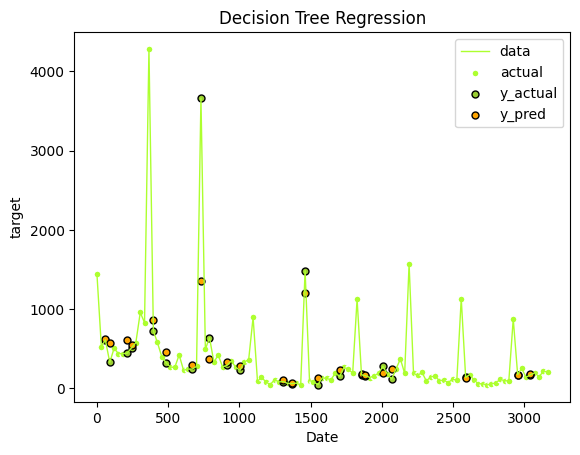

r2_score: 0.9414617649843439 
    n_estimators = 250
    random_state = 1
    test_size = 23


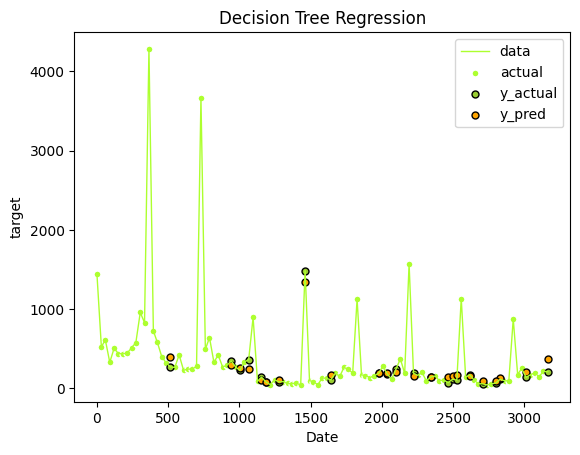

r2_score: 0.48961865981460706 
    n_estimators = 250
    random_state = 2
    test_size = 23


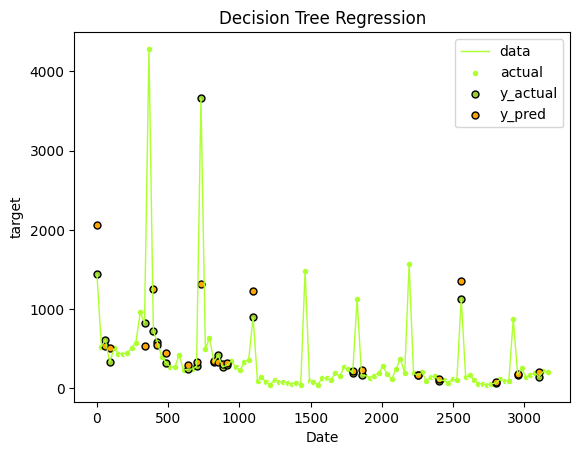

r2_score: 0.7760259950319229 
    n_estimators = 250
    random_state = 3
    test_size = 23


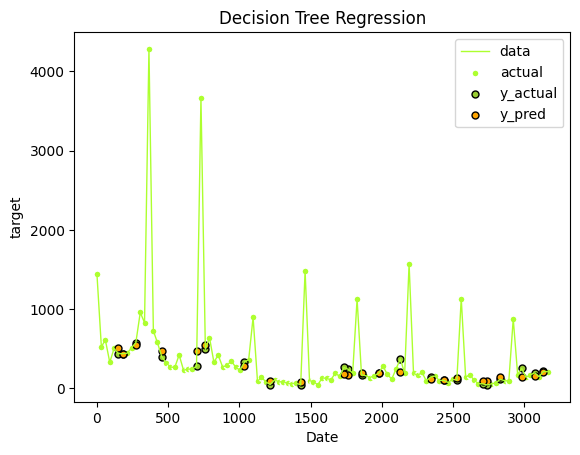

r2_score: 0.5381761496258226 
    n_estimators = 250
    random_state = 4
    test_size = 23


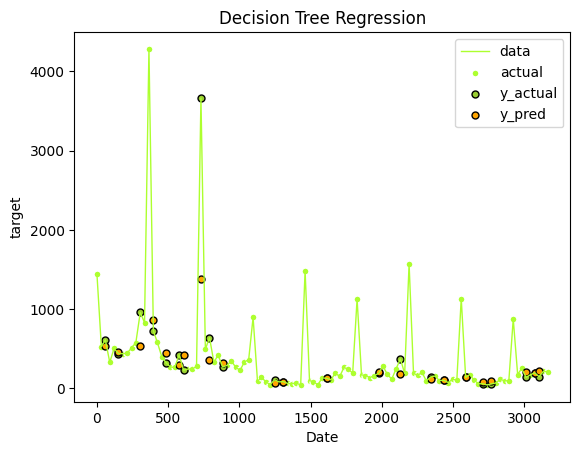

r2_score: 0.786935603086318 
    n_estimators = 250
    random_state = 5
    test_size = 23


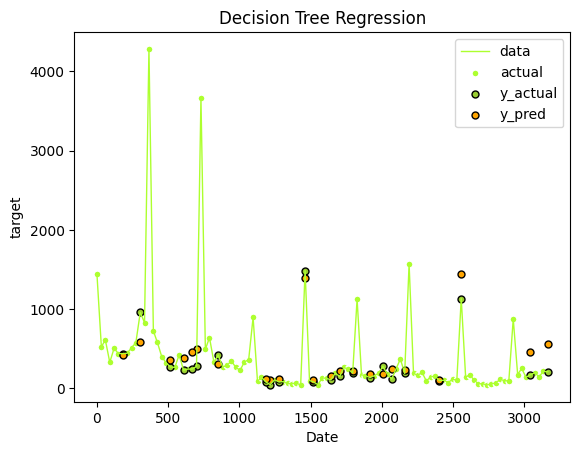

r2_score: 0.5770586866518382 
    n_estimators = 250
    random_state = 6
    test_size = 23


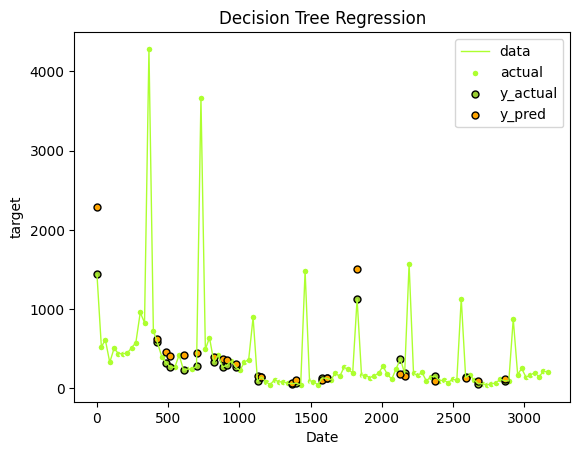

r2_score: 0.4442455922710432 
    n_estimators = 250
    random_state = 7
    test_size = 23


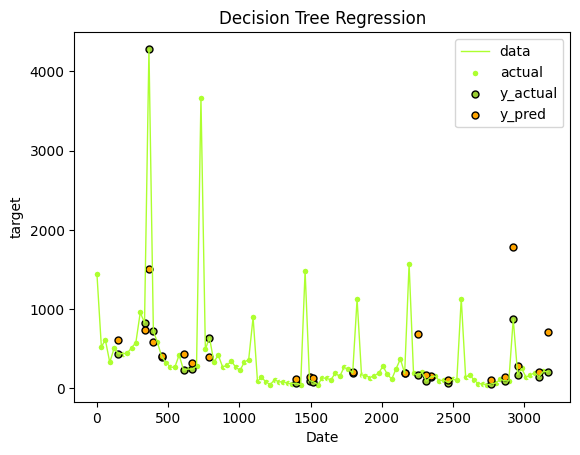

r2_score: 0.4700141358534792 
    n_estimators = 250
    random_state = 8
    test_size = 23


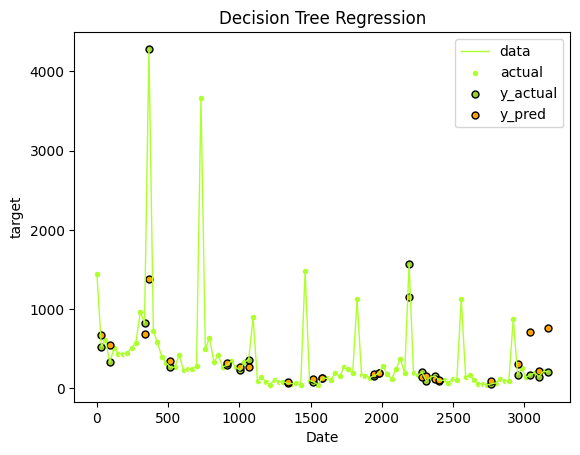

r2_score: 0.8694813568583313 
    n_estimators = 250
    random_state = 9
    test_size = 23


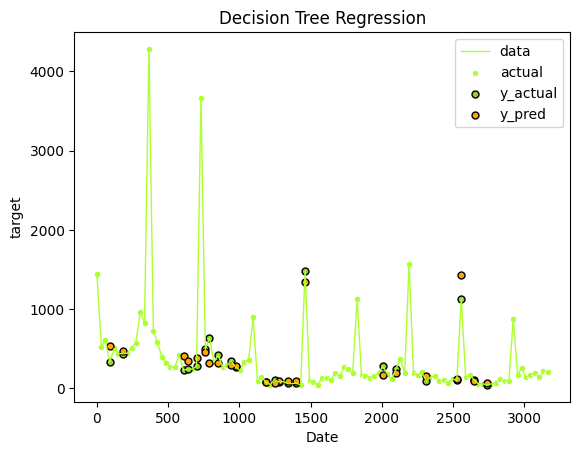

R2 average = 0.5865410216712086


In [3]:
r2_total = 0
for i in range(0,10):
    n_estimators = 250
    test_size = 23
    random_state=i
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    regressor = RandomForestRegressor(n_estimators=n_estimators,bootstrap=True, max_features=0.85)
    regressor.fit(X_train,y_train.to_numpy().flatten())
    y_pred = regressor.predict(X_test)
    r2 = r2_score(y_test,y_pred)
    r2_total += r2
    print(f"r2_score: {r2} \n\
    n_estimators = {n_estimators}\n\
    random_state = {random_state}\n\
    test_size = {test_size}")
    # Plot the results
    plt.figure()
    plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
    plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
    plt.scatter(X_test['DATE_DELTA'], y_test, s=25, edgecolor="black", c="yellowgreen", label="y_actual")
    plt.scatter(X_test['DATE_DELTA'], y_pred,s=25, edgecolor="black", c="orange", label="y_pred")

    plt.xlabel("Date")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()
    
print("R2 average =", r2_total/float(11))